In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score


excel_data = pd.read_excel('./Dataset/Coca/Coca(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal,Variety,District
0,MANGALURU,2019-04-01 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
1,MANGALURU,2019-04-02 00:00:00,AVERAGE,227,Quintal,12000,18000,16000,COCA,Dakshina Kannada
2,MANGALURU,2019-04-03 00:00:00,AVERAGE,226,Quintal,12000,18000,16000,COCA,Dakshina Kannada
3,MANGALURU,2019-04-04 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
4,MANGALURU,2019-04-05 00:00:00,AVERAGE,231,Quintal,12000,18000,16000,COCA,Dakshina Kannada


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [14]:
df.isna().sum()

Market      0
Date        0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
Variety     0
District    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1867 non-null   object
 1   Date      1867 non-null   object
 2   Grade     1867 non-null   object
 3   Arrivals  1867 non-null   int64 
 4   Unit      1867 non-null   object
 5   Min       1867 non-null   int64 
 6   Max       1867 non-null   int64 
 7   Modal     1867 non-null   int64 
 8   Variety   1867 non-null   object
 9   District  1867 non-null   object
dtypes: int64(4), object(6)
memory usage: 146.0+ KB


In [16]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1867 non-null   object        
 1   Date      1867 non-null   datetime64[ns]
 2   Grade     1867 non-null   object        
 3   Arrivals  1867 non-null   int64         
 4   Unit      1867 non-null   object        
 5   Min       1867 non-null   int64         
 6   Max       1867 non-null   int64         
 7   Modal     1867 non-null   int64         
 8   Variety   1867 non-null   object        
 9   District  1867 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 146.0+ KB


In [18]:
df_test.sort_values(by='Date',inplace=True)

In [19]:
df_test = df[['Date','Arrivals','Min','Max','Modal']]
df_test

,Date,Arrivals,Min,Max,Modal
801,2015-01-01,53,8900,16000,14000
802,2015-01-02,55,8900,16000,14000
803,2015-01-03,55,8900,16000,14000
804,2015-01-05,58,8900,16000,14000
805,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
1862,2022-11-04,263,25000,34000,30000
1863,2022-11-05,2900,20000,25000,24000
1864,2022-12-01,35,26000,31000,30800
1865,2022-12-04,962,22600,30400,27000


In [20]:
df_test.index = df_test['Date']
df_test

,Date,Arrivals,Min,Max,Modal
Date,,,,,
2015-01-01,2015-01-01,53,8900,16000,14000
2015-01-02,2015-01-02,55,8900,16000,14000
2015-01-03,2015-01-03,55,8900,16000,14000
2015-01-05,2015-01-05,58,8900,16000,14000
2015-01-06,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
2022-11-04,2022-11-04,263,25000,34000,30000
2022-11-05,2022-11-05,2900,20000,25000,24000
2022-12-01,2022-12-01,35,26000,31000,30800


In [21]:
df_test.drop('Date',axis=1,inplace=True)
df_test

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_15392\1244294919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Date',axis=1,inplace=True)


,Arrivals,Min,Max,Modal
Date,,,,
2015-01-01,53,8900,16000,14000
2015-01-02,55,8900,16000,14000
2015-01-03,55,8900,16000,14000
2015-01-05,58,8900,16000,14000
2015-01-06,40,8900,16000,14000
...,...,...,...,...
2022-11-04,263,25000,34000,30000
2022-11-05,2900,20000,25000,24000
2022-12-01,35,26000,31000,30800


In [22]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Modal):
        result = adfuller(Modal)
        labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
        for values, label in zip(result, labels):
            print(label+' : '+str(values))
        if result[1] <= 0.05:
            print("The time series is likely stationary.")
        else:
            print("The time series is likely non-stationary.")

In [23]:
adfuller_test(df_test['Modal'])

ADF test statistic : -0.22043105084624173
p-value : 0.9360420673057216
Lags used : 20
No. of observations used : 1846
The time series is likely non-stationary.


In [24]:
df_demo = df_test
df_demo['Modal first difference'] = df_demo['Modal'] - df_demo['Modal'].shift(1)

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_15392\575023053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['Modal first difference'] = df_demo['Modal'] - df_demo['Modal'].shift(1)


In [25]:
df_demo.head(20)
df_demo = df_demo.dropna()
df_demo

,Arrivals,Min,Max,Modal,Modal first difference
Date,,,,,
2015-01-02,55,8900,16000,14000,0.0
2015-01-03,55,8900,16000,14000,0.0
2015-01-05,58,8900,16000,14000,0.0
2015-01-06,40,8900,16000,14000,0.0
2015-01-07,41,8800,16000,14000,0.0
...,...,...,...,...,...
2022-11-04,263,25000,34000,30000,200.0
2022-11-05,2900,20000,25000,24000,-6000.0
2022-12-01,35,26000,31000,30800,6800.0


In [26]:
adfuller_test(df_demo['Modal first difference'])

ADF test statistic : -17.746992219818235
p-value : 3.3828735265995105e-30
Lags used : 19
No. of observations used : 1846
The time series is likely stationary.


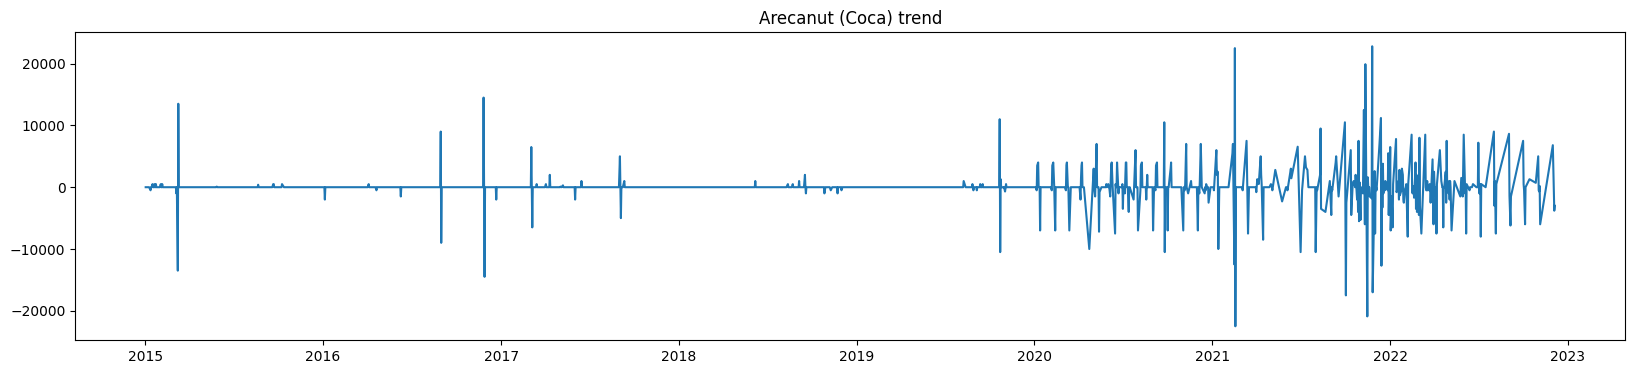

In [27]:
plt.figure(figsize=(20,4))
plt.plot(df_demo['Modal first difference'])
plt.title('Arecanut (Coca) trend')
plt.show()

In [28]:
df_demo1 = df_demo
#df_demo1.drop('Modal',axis=1,inplace=True)
df_demo1

,Arrivals,Min,Max,Modal,Modal first difference
Date,,,,,
2015-01-02,55,8900,16000,14000,0.0
2015-01-03,55,8900,16000,14000,0.0
2015-01-05,58,8900,16000,14000,0.0
2015-01-06,40,8900,16000,14000,0.0
2015-01-07,41,8800,16000,14000,0.0
...,...,...,...,...,...
2022-11-04,263,25000,34000,30000,200.0
2022-11-05,2900,20000,25000,24000,-6000.0
2022-12-01,35,26000,31000,30800,6800.0


In [22]:
demo1_scaler = MinMaxScaler(feature_range=(0,1))

# Define the columns you want to scale
columns_to_scale = ['Arrivals', 'Min', 'Max', 'Modal first difference']

# Apply MinMaxScaler to the selected columns
df_demo1[columns_to_scale] = demo1_scaler.fit_transform(df_demo1[columns_to_scale])

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_18688\1240589203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo1[columns_to_scale] = demo1_scaler.fit_transform(df_demo1[columns_to_scale])


In [19]:
df_demo1

,Arrivals,Min,Max,Modal,Modal first difference
Date,,,,,
2015-01-02,0.001486,0.194301,0.026455,14000,0.496689
2015-01-03,0.001486,0.194301,0.026455,14000,0.496689
2015-01-05,0.001572,0.194301,0.026455,14000,0.496689
2015-01-06,0.001057,0.194301,0.026455,14000,0.496689
2015-01-07,0.001086,0.191710,0.026455,14000,0.496689
...,...,...,...,...,...
2022-11-04,0.007429,0.611399,0.502646,30000,0.501104
2022-11-05,0.082779,0.481865,0.264550,24000,0.364238
2022-12-01,0.000914,0.637306,0.423280,30800,0.646799


### -------------------------------------------------------------------

In [20]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3] 
        y.append(label)
    return np.array(X), np.array(y)

In [21]:
WINDOW_SIZE = 1 
X_demo1, y_demo1= df_to_X_y(df_demo1,WINDOW_SIZE)
X_demo1.shape, y_demo1.shape

((1865, 1, 5), (1865, 3))

In [22]:
X_train_demo1, y_train_demo1 = X_demo1[:1500], y_demo1[:1500]
X_val_demo1, y_val_demo1 = X_demo1[1500:1750], y_demo1[1500:1750]
X_test_demo1, y_test_demo1 = X_demo1[1750:] ,y_demo1[1750:]

X_train_demo1.shape, y_train_demo1.shape, X_val_demo1.shape, y_val_demo1.shape, X_test_demo1.shape, y_test_demo1.shape

((1500, 1, 5), (1500, 3), (250, 1, 5), (250, 3), (115, 1, 5), (115, 3))

In [23]:
model_demo1= Sequential()
model_demo1.add(InputLayer((1,4))),
model_demo1.add(LSTM(64)),
model_demo1.add(Dense(64, 'relu')),
model_demo1.add(Dense(30, 'relu')),
model_demo1.add(Dense(3))

model_demo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 23867 (93.23 KB)
Trainable params: 23867 (93.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model_demo1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

In [ ]:
hist_demo1 = model_demo1.fit(X_train_demo1, y_train_demo1, validation_data=(X_val_demo1, y_val_demo1), epochs=50, verbose=2)

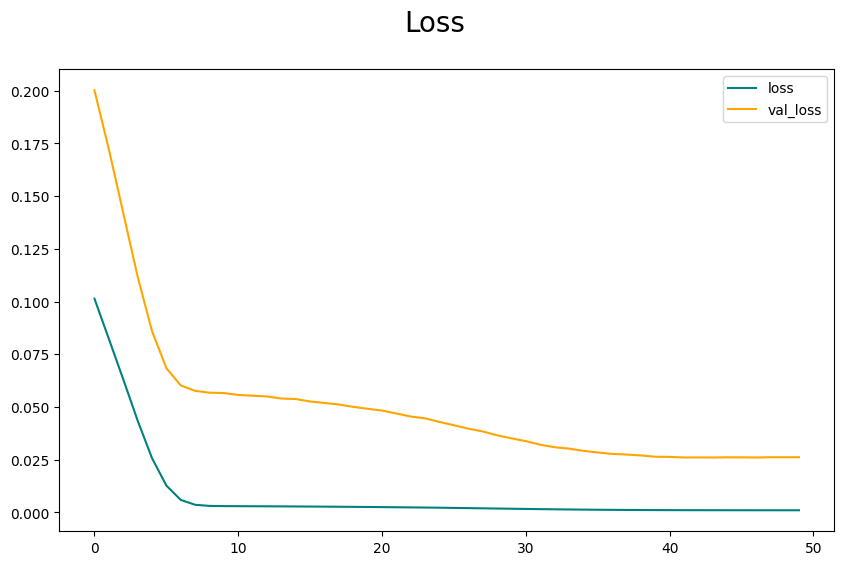

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist_demo1.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_demo1.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [ ]:
train_prediction = model_demo1.predict(X_train_demo1, verbose=0)
train_prediction.shape

(1500, 3)

In [ ]:
y_train_demo1.shape

(1500, 3)

In [ ]:
mae_train_demo1 = mean_absolute_error(y_train_demo1, train_prediction)
mae_train_demo1

0.01778018112324823

In [ ]:
r2_train_demo1 = r2_score(y_train_demo1, train_prediction) 
r2_train_demo1*100

43.341026062576795

In [77]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')


   

Mean absolute error for Train predictions is 0.01778018112324823
-------------------------------------------------------------------------------------
r2 for Train predictions is 43.341026062576795
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.180335    0.194301        0.052891    0.026455          0.497541   
1        0.180335    0.194301        0.052891    0.026455          0.497541   
2        0.180336    0.194301        0.052887    0.026455          0.497560   
3        0.180333    0.191710        0.052909    0.026455          0.497448   
4        0.179395    0.191710        0.052197    0.026455          0.497128   
5        0.179396    0.191710        0.052194    0.026455          0.497141   
6        0.179395    0.194301        0.052197    0.026455          0.497128   
7        0.179816    0.194301        0.053103    0.026455          0.494253   
8    

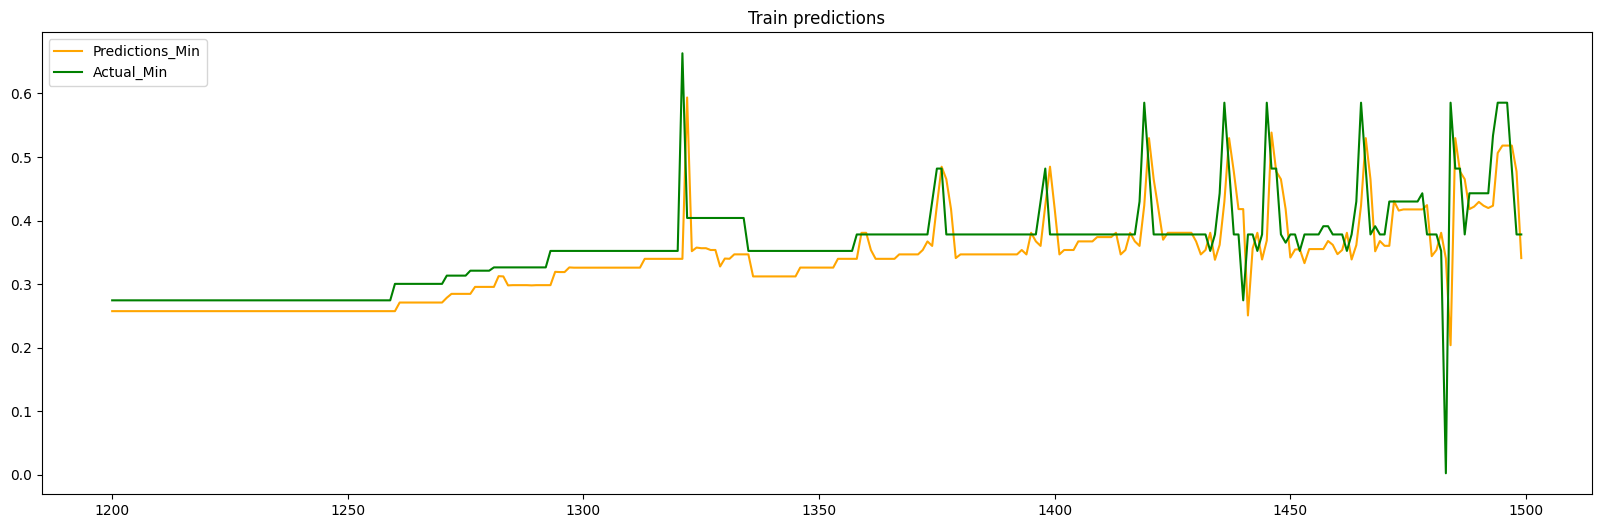

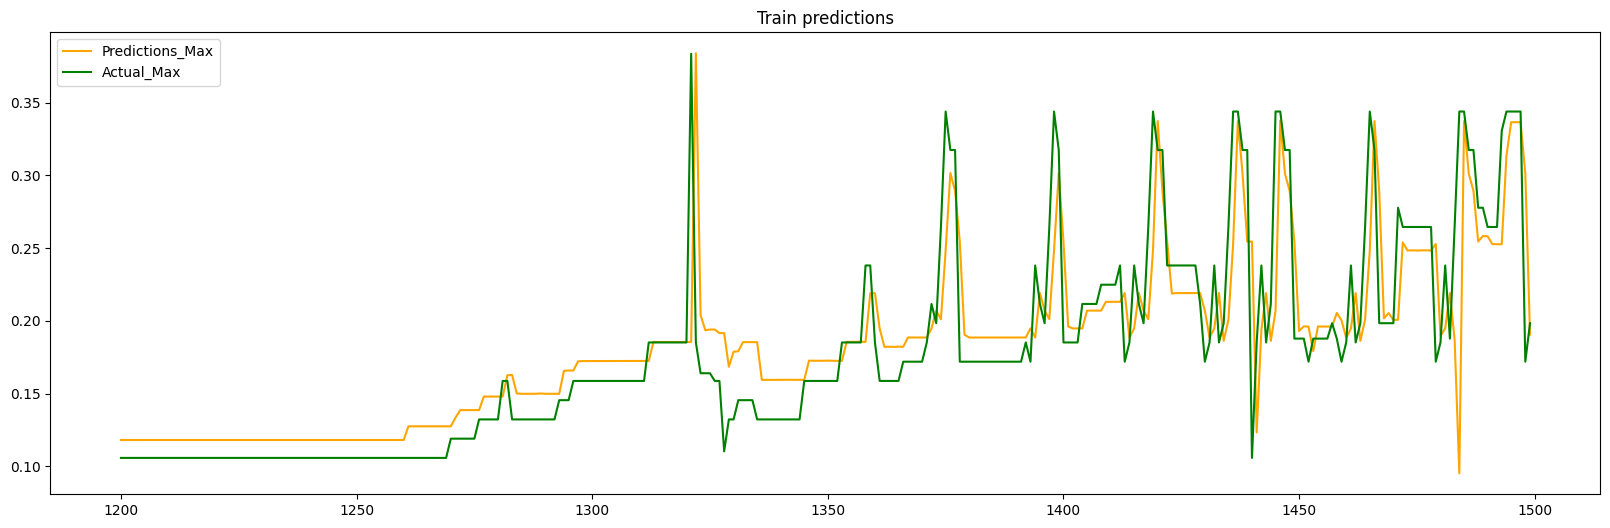

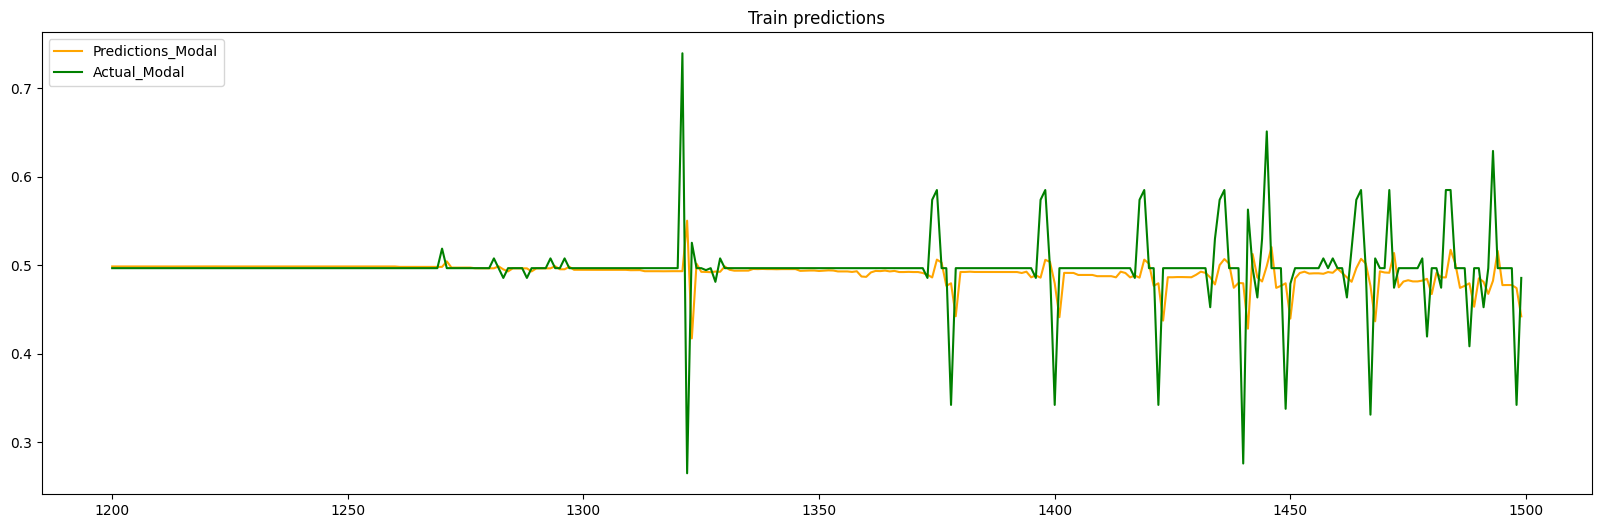

In [ ]:
plot_predictions(model_demo1, X_train_demo1, y_train_demo1, start=1200, end=len(X_train_demo1), tag='Train predictions')

Mean absolute error for Val Prediction is 0.09755218951509916
-------------------------------------------------------------------------------------
r2 for Val Prediction is -14.251187200716894
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.360207    0.430052        0.201182    0.264550          0.485961   
1        0.423865    0.481865        0.248537    0.343915          0.506664   
2        0.484809    0.481865        0.301578    0.317460          0.503544   
3        0.465141    0.378238        0.289386    0.317460          0.476307   
4        0.418119    0.585492        0.254550    0.343915          0.479584   
5        0.518373    0.481865        0.336423    0.343915          0.479074   
6        0.477249    0.481865        0.301084    0.317460          0.475701   
7        0.465148    0.481865        0.289226    0.291005          0.477957   
8        0

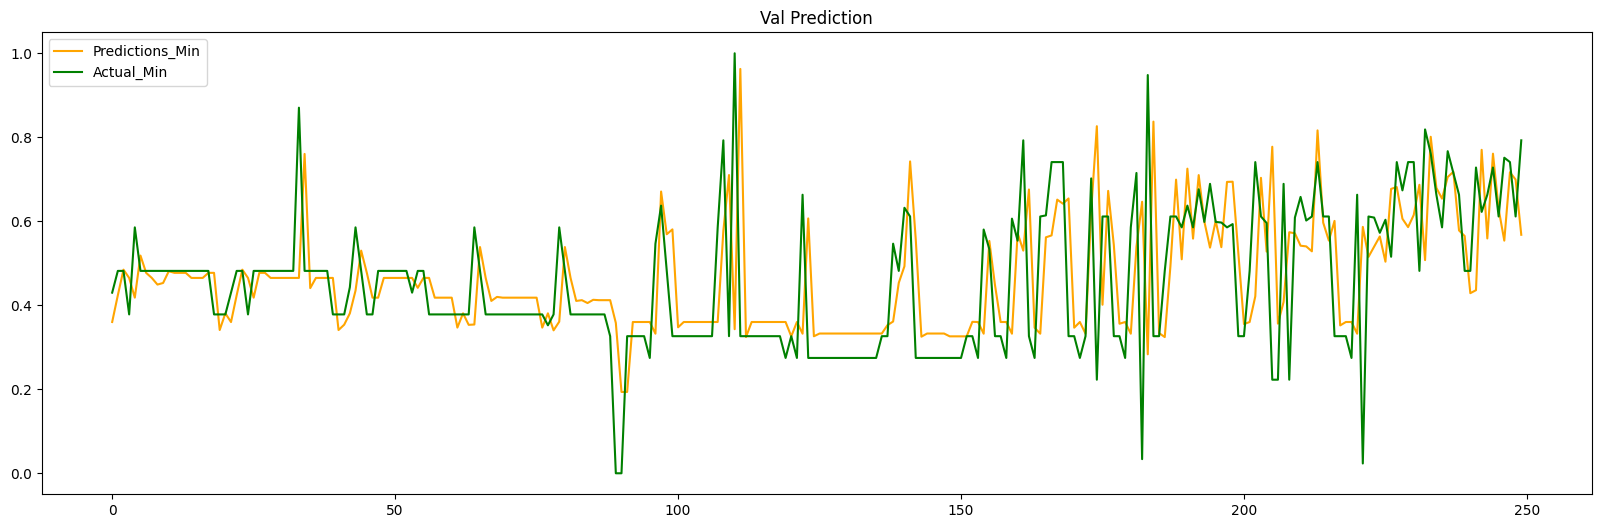

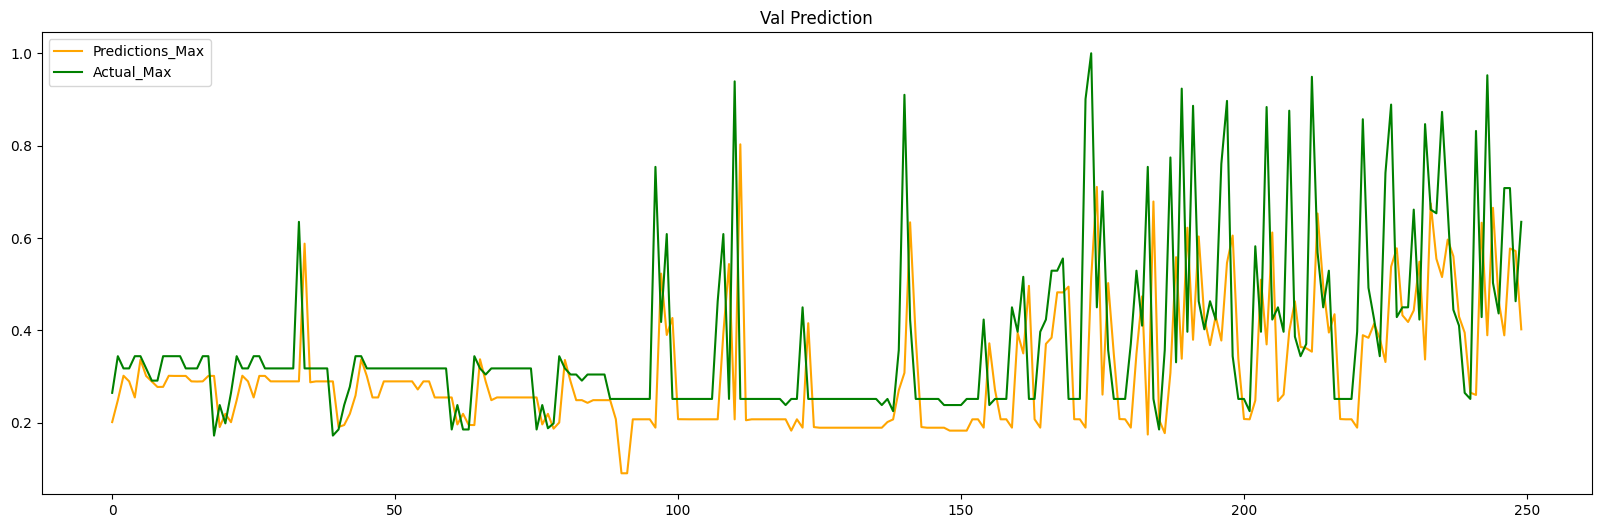

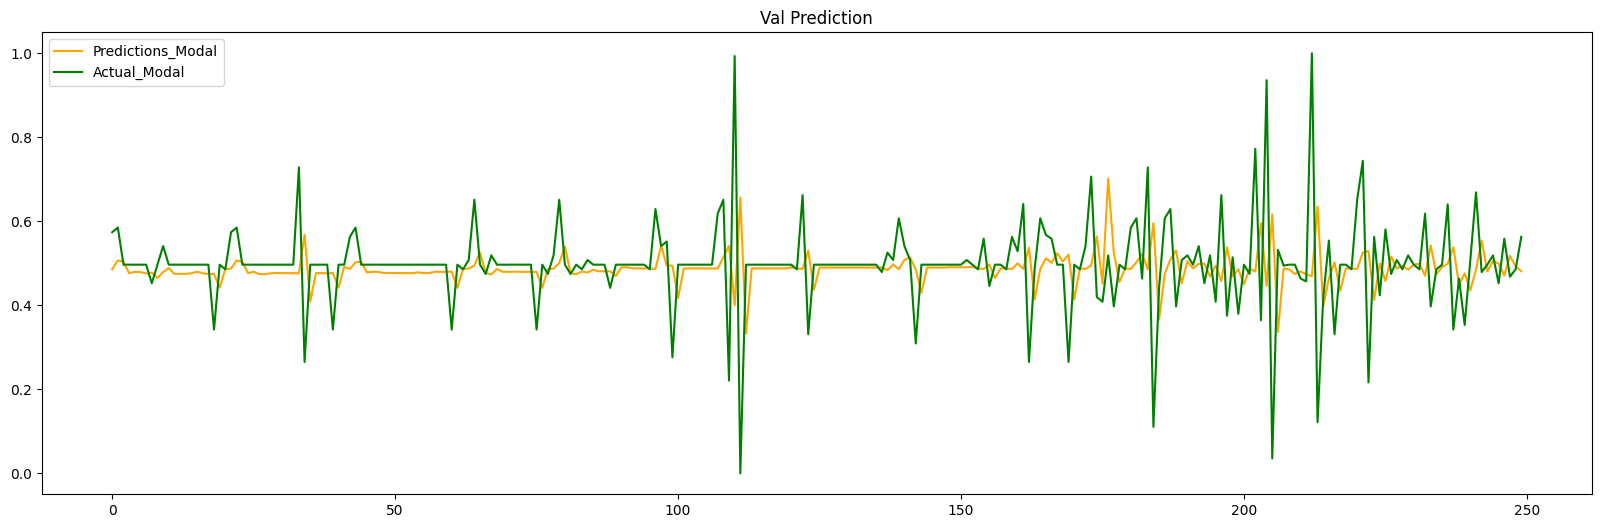

In [ ]:
plot_predictions(model_demo1, X_val_demo1, y_val_demo1, start=0, end=len(X_val_demo1), tag='Val Prediction')

Mean absolute error for Val Prediction is 0.08939224545599894
-------------------------------------------------------------------------------------
r2 for Val Prediction is -20.76253207045829
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.706499    0.740933        0.555851    0.634921          0.518558   
1        0.684148    0.792746        0.535919    0.634921          0.509958   
2        0.689973    0.740933        0.554208    0.423280          0.489771   
3        0.594635    0.704663        0.429539    0.476190          0.475997   
4        0.606466    0.611399        0.442544    0.634921          0.487170   
5        0.629930    0.663212        0.486859    0.476190          0.489350   
6        0.594680    0.481865        0.427370    0.264550          0.490908   
7        0.425955    0.481865        0.264641    0.251323          0.425462   
8        0.

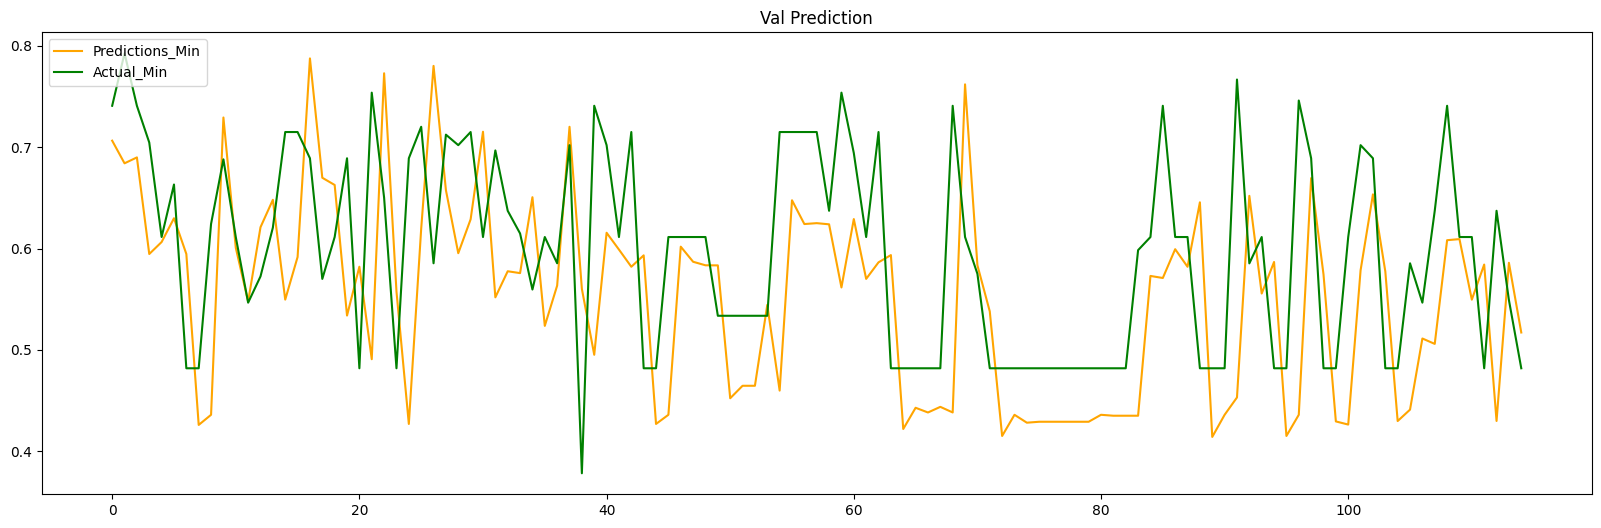

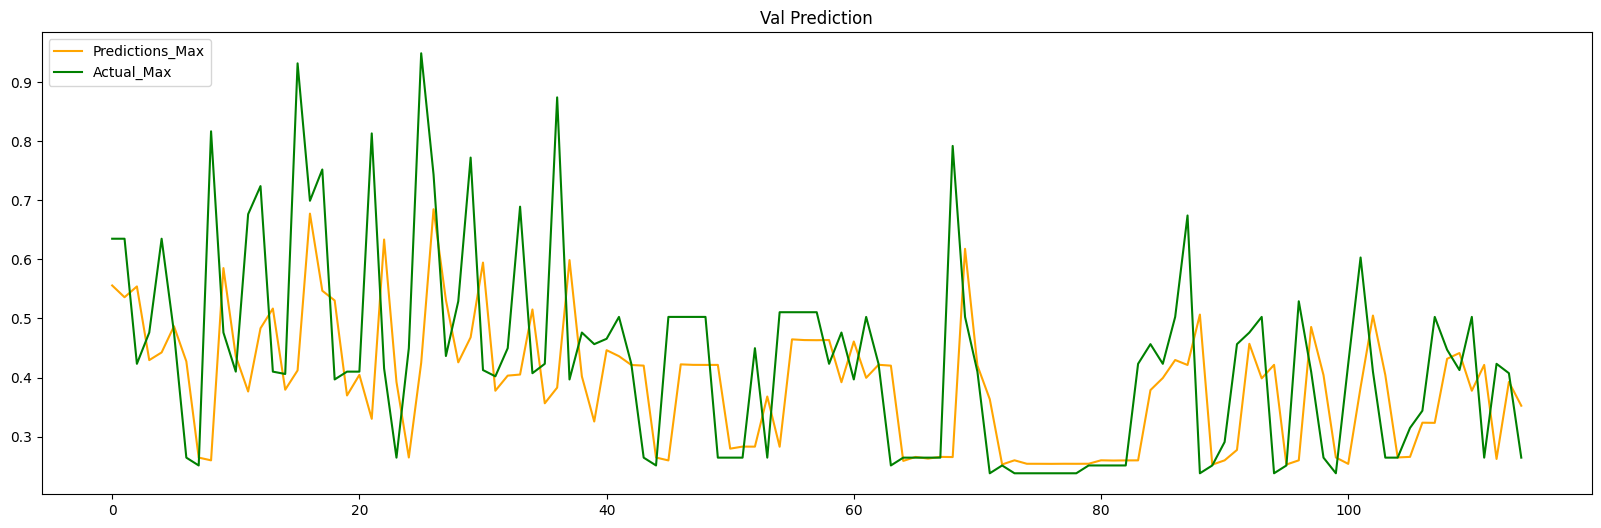

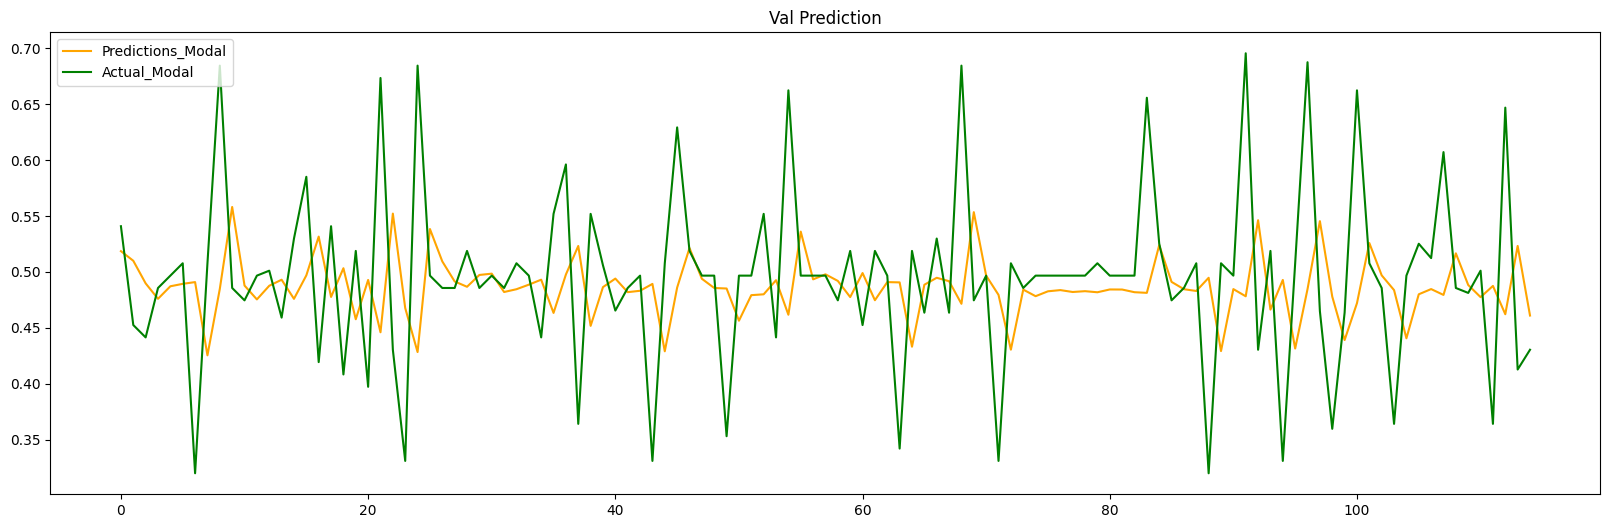

In [ ]:
plot_predictions(model_demo1, X_test_demo1, y_test_demo1, start=0, end=len(X_test_demo1), tag='Val Prediction')

In [ ]:
# df_test.to_excel('./Dataset/test.xlsx',index=True)

In [29]:
df_test

,Arrivals,Min,Max,Modal,Modal first difference
Date,,,,,
2015-01-01,53,8900,16000,14000,NaN
2015-01-02,55,8900,16000,14000,0.0
2015-01-03,55,8900,16000,14000,0.0
2015-01-05,58,8900,16000,14000,0.0
2015-01-06,40,8900,16000,14000,0.0
...,...,...,...,...,...
2022-11-04,263,25000,34000,30000,200.0
2022-11-05,2900,20000,25000,24000,-6000.0
2022-12-01,35,26000,31000,30800,6800.0


In [69]:
df_test = df_test.drop('Modal first difference', axis=1)

In [74]:
df_test.to_csv('./Dataset/Coca/coca_test.csv',index=True)

In [75]:
df_1 = pd.read_csv('./Dataset/Coca/coca_test.csv')
df_1.head()

,Date,Min,Max,Modal
0,2015-01-01,8900,16000,14000
1,2015-01-02,8900,16000,14000
2,2015-01-03,8900,16000,14000
3,2015-01-05,8900,16000,14000
4,2015-01-06,8900,16000,14000


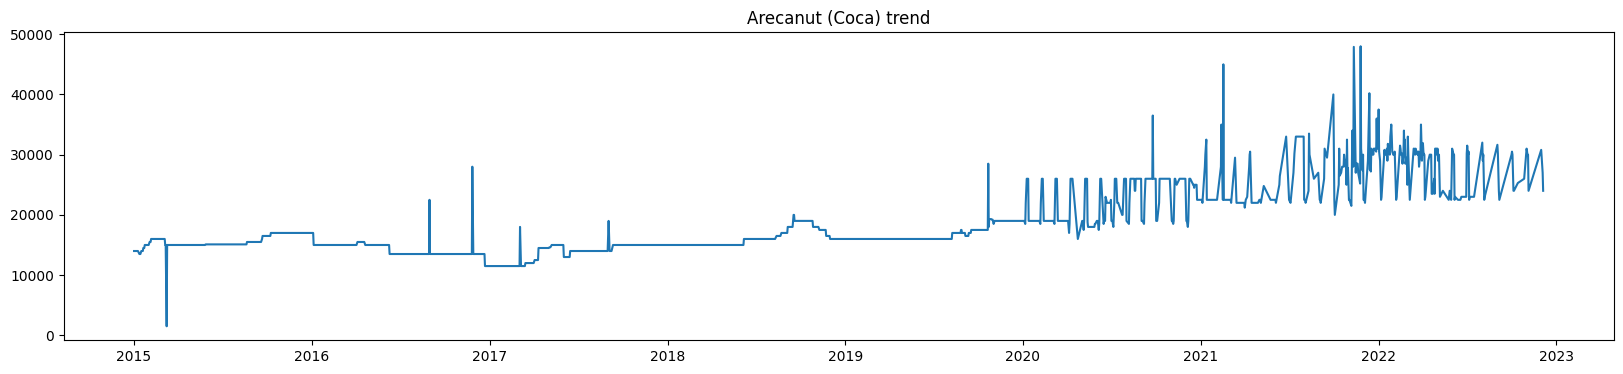

In [30]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Arecanut (Coca) trend')
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler 

scaler_coca = MinMaxScaler(feature_range=(0,1))

In [32]:
df_coca1 = df_test.drop('Arrivals',axis=1)

In [33]:
df_coca1

,Min,Max,Modal,Modal first difference
Date,,,,
2015-01-01,8900,16000,14000,NaN
2015-01-02,8900,16000,14000,0.0
2015-01-03,8900,16000,14000,0.0
2015-01-05,8900,16000,14000,0.0
2015-01-06,8900,16000,14000,0.0
...,...,...,...,...
2022-11-04,25000,34000,30000,200.0
2022-11-05,20000,25000,24000,-6000.0
2022-12-01,26000,31000,30800,6800.0


In [34]:
df_coca1 = df_coca1.drop('Modal first difference',axis=1)

In [35]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [36]:
df_coca = df_coca1

In [37]:
df_coca

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [38]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_coca[columns_to_scale] = scaler_coca.fit_transform(df_coca[columns_to_scale])

In [192]:
#df_coca.drop('Modal first difference',axis=1,inplace=True)

In [ ]:
#df_coca.drop('Arrivals',axis=1,inplace=True)

In [39]:
df_coca.head(10)

,Min,Max,Modal
Date,,,
2015-01-01,0.194301,0.026455,0.268817
2015-01-02,0.194301,0.026455,0.268817
2015-01-03,0.194301,0.026455,0.268817
2015-01-05,0.194301,0.026455,0.268817
2015-01-06,0.194301,0.026455,0.268817
2015-01-07,0.191710,0.026455,0.268817
2015-01-08,0.191710,0.026455,0.268817
2015-01-09,0.191710,0.026455,0.268817
2015-01-12,0.194301,0.026455,0.258065


In [40]:
df_coca.tail()

,Min,Max,Modal
Date,,,
2022-11-04,0.611399,0.502646,0.612903
2022-11-05,0.481865,0.264550,0.483871
2022-12-01,0.637306,0.423280,0.630108
2022-12-04,0.549223,0.407407,0.548387
2022-12-05,0.481865,0.264550,0.483871


In [41]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2] 
        y.append(label)
    return np.array(X), np.array(y)

In [42]:
WINDOW_SIZE = 3 
X_coca, y_coca= df_to_X_y(df_coca,WINDOW_SIZE)
X_coca.shape, y_coca.shape

((1864, 3, 3), (1864, 3))

In [43]:
train_size = int(len(df_test)*0.8)
val_size = int((len(df_test) - train_size)*0.7)
test_size = len(df_test) - (train_size + val_size)

print(train_size, val_size ,test_size)

1493 261 113


In [44]:
y_coca

array([[0.19430052, 0.02645503, 0.2688172 ],
       [0.19430052, 0.02645503, 0.2688172 ],
       [0.19170984, 0.02645503, 0.2688172 ],
       ...,
       [0.6373057 , 0.42328042, 0.63010753],
       [0.5492228 , 0.40740741, 0.5483871 ],
       [0.48186528, 0.26455026, 0.48387097]])

### 1105 - 2019[start]
### 1740 - 2022[start]

In [47]:
X_train, y_train = X_coca[:1500], y_coca[:1500]
X_val, y_val = X_coca[1500:1750], y_coca[1500:1750]
X_test, y_test = X_coca[1750:] ,y_coca[1750:] 

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1500, 3, 3), (1500, 3), (250, 3, 3), (250, 3), (114, 3, 3), (114, 3))

In [38]:
model_coca= Sequential()
model_coca.add(InputLayer((3,3))),
model_coca.add(LSTM(64)),
model_coca.add(Dense(64, 'relu')),
model_coca.add(Dense(30, 'relu')),
model_coca.add(Dense(3)),

model_coca.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 30)                1950      
                                                                 
 dense_5 (Dense)             (None, 3)                 93        
                                                                 
Total params: 23611 (92.23 KB)
Trainable params: 23611 (92.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model_coca.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

In [40]:
hist_coca = model_coca.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=2)

Epoch 1/100
47/47 - 4s - loss: 0.0572 - mean_absolute_error: 0.2174 - val_loss: 0.2190 - val_mean_absolute_error: 0.4426 - 4s/epoch - 87ms/step
Epoch 2/100
47/47 - 0s - loss: 0.0494 - mean_absolute_error: 0.2002 - val_loss: 0.2014 - val_mean_absolute_error: 0.4228 - 444ms/epoch - 9ms/step
Epoch 3/100
47/47 - 0s - loss: 0.0414 - mean_absolute_error: 0.1815 - val_loss: 0.1766 - val_mean_absolute_error: 0.3920 - 369ms/epoch - 8ms/step
Epoch 4/100
47/47 - 0s - loss: 0.0301 - mean_absolute_error: 0.1512 - val_loss: 0.1354 - val_mean_absolute_error: 0.3375 - 435ms/epoch - 9ms/step
Epoch 5/100
47/47 - 0s - loss: 0.0154 - mean_absolute_error: 0.1026 - val_loss: 0.0818 - val_mean_absolute_error: 0.2493 - 411ms/epoch - 9ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0044 - mean_absolute_error: 0.0492 - val_loss: 0.0435 - val_mean_absolute_error: 0.1598 - 339ms/epoch - 7ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0020 - mean_absolute_error: 0.0318 - val_loss: 0.0380 - val_mean_absolute_error: 0.1439 - 322

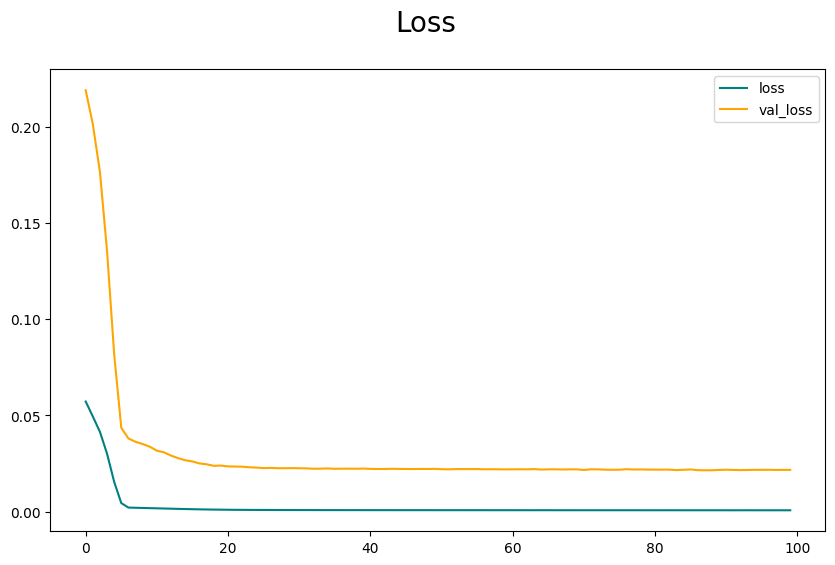

In [41]:
plt.figure(figsize=(10,6))
plt.plot(hist_coca.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_coca.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [ ]:
# model_coca.save('./models/Coca/model_coca1.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# model_coca = load_model('./models/Coca/model_coca1.h5')

In [42]:
X_train.shape

(1500, 3, 3)

In [43]:
train_predictions = model_coca.predict(X_train, verbose=0)

In [44]:
train_predictions

array([[0.19337553, 0.03169287, 0.26563692],
       [0.19337553, 0.03169287, 0.26563692],
       [0.19337553, 0.03169287, 0.26563692],
       ...,
       [0.49835885, 0.30716383, 0.52152836],
       [0.4491773 , 0.26237753, 0.47306976],
       [0.40162048, 0.2303036 , 0.41879156]], dtype=float32)

In [45]:
train_predictions.shape
#train_prediction

(1500, 3)

In [46]:
y_train.shape

(1500, 3)

In [47]:
y_train_pred = scaler_coca.inverse_transform(train_predictions)
y_train_pred.shape

(1500, 3)

In [48]:
y_train_pred

array([[ 8864.295, 16197.99 , 13852.117],
       [ 8864.295, 16197.99 , 13852.117],
       [ 8864.295, 16197.99 , 13852.117],
       ...,
       [20636.65 , 26610.793, 25751.07 ],
       [18738.244, 24917.871, 23497.744],
       [16902.55 , 23705.477, 20973.807]], dtype=float32)

In [137]:
x = pd.DataFrame({'Train predictions(scaled)':train_predictions.flatten(),
                  'Train_prediction (inverse_transformed)':y_train_pred.flatten(),
                  'Actual':scaler_coca.inverse_transform(y_train).flatten()})

x.head(20)

,Train predictions(scaled),Train_prediction (inverse_transformed),Actual
0,0.193376,8864.294922,8900.0
1,0.031693,16197.990234,16000.0
2,0.265637,13852.117188,14000.0
3,0.193376,8864.294922,8900.0
4,0.031693,16197.990234,16000.0
5,0.265637,13852.117188,14000.0
6,0.193376,8864.294922,8800.0
7,0.031693,16197.990234,16000.0
8,0.265637,13852.117188,14000.0
9,0.192551,8832.477539,8800.0


In [51]:
def plot_predictions1D(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'Predictions':predictions.reshape(-1),'Actual':y})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['Predictions'][start:end],label='Predictions_modal')
    plt.plot(df['Actual'][start:end],label='Actual_modal')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    

In [52]:
def plot_predictions_4D(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({
                        'predicted_Arrivals': predictions[:, 0],
                        'Actual_Arrivals': y[:,0],
                        'predicted_Min': predictions[:, 1],
                        'Actual_Min': y[:, 1],
                        'predicted_Max': predictions[:, 2],
                        'Actual_Max': y[:, 2],
                        'predicted_Modal': predictions[:, 3],
                        'Actual_Modal': y[:, 3]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['predicted_Arrivals'][start:end],label='Predicted_Arrivals')
    plt.plot(df['Actual_Arrivals'][start:end],label='Actual_Arrivals')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['predicted_Min'][start:end],label='Predicted_Min')
    plt.plot(df['Actual_Min'][start:end],label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['predicted_Max'][start:end],label='Predicted_Max')
    plt.plot(df['Actual_Max'][start:end],label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['predicted_Modal'][start:end],label='Predicted_Modal')
    plt.plot(df['Actual_Modal'][start:end],label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')


In [53]:
X_train.shape, y_train.shape

((1500, 3, 3), (1500, 3))

Mean absolute error for Train prediction is 0.0100499278510083
-------------------------------------------------------------------------------------
r2 for Train prediction is 82.98948020880552
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.193376    0.194301        0.031693    0.026455          0.265637   
1        0.193376    0.194301        0.031693    0.026455          0.265637   
2        0.193376    0.191710        0.031693    0.026455          0.265637   
3        0.192551    0.191710        0.031709    0.026455          0.265624   
4        0.191696    0.191710        0.031710    0.026455          0.265599   
5        0.190831    0.194301        0.031698    0.026455          0.265562   
6        0.191942    0.194301        0.031539    0.026455          0.263726   
7        0.193263    0.194301        0.031782    0.026455          0.261715   
8        

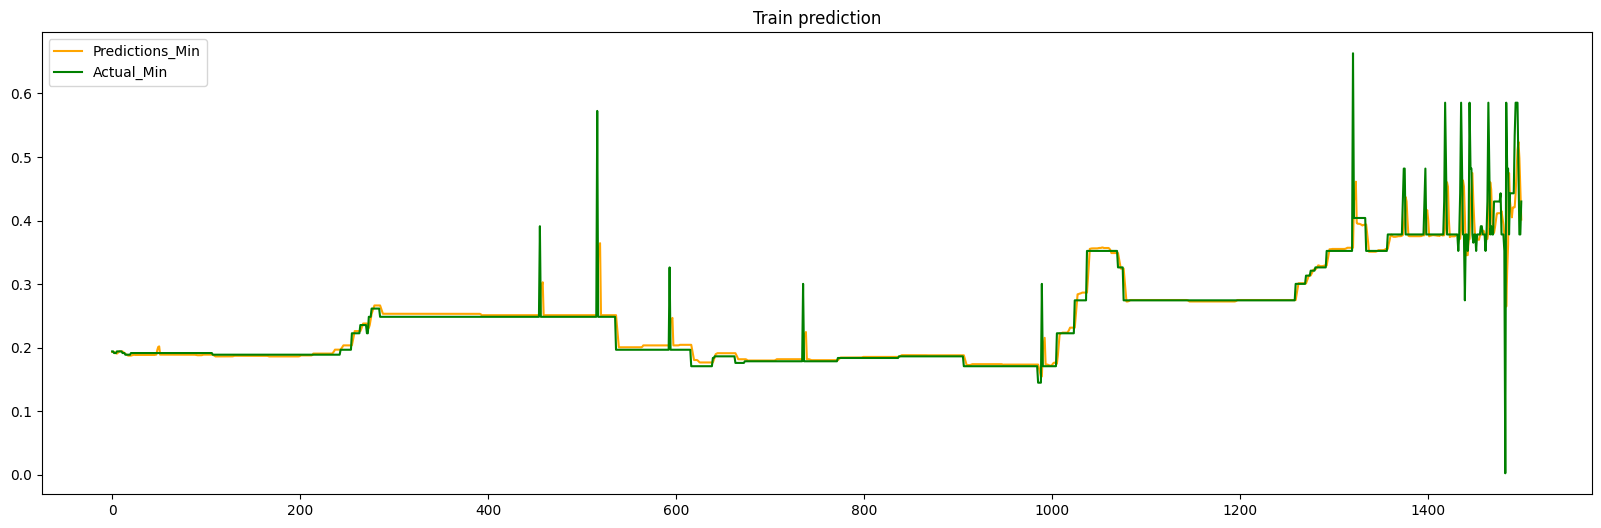

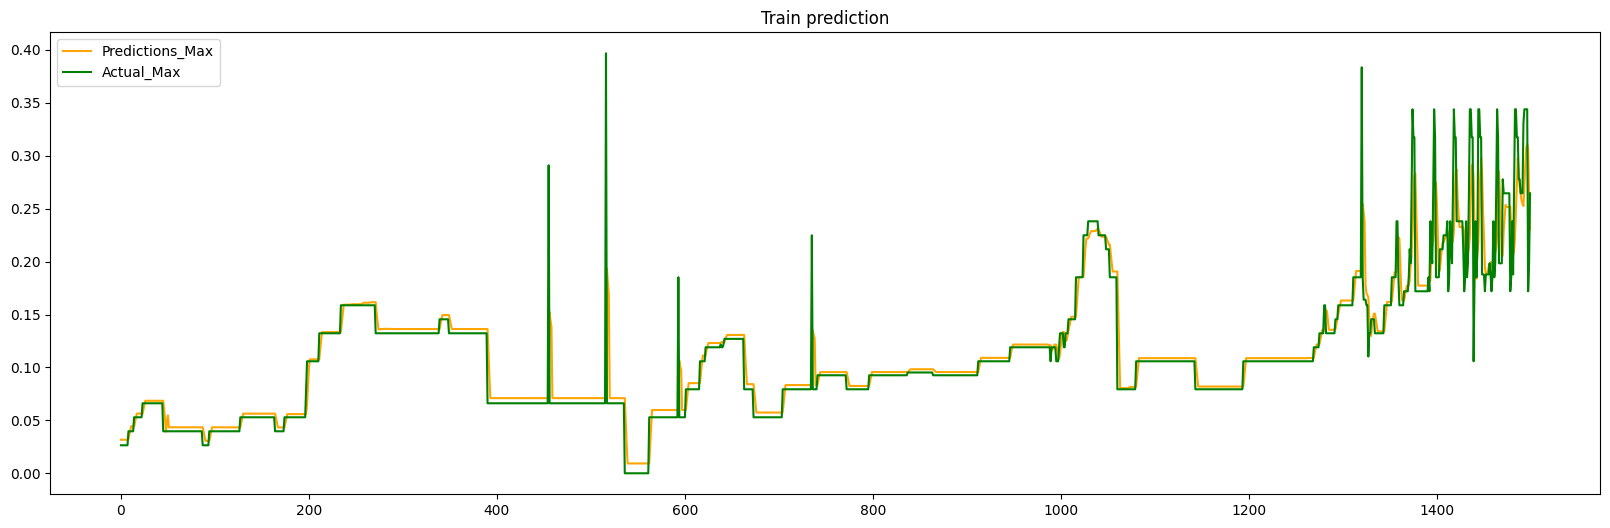

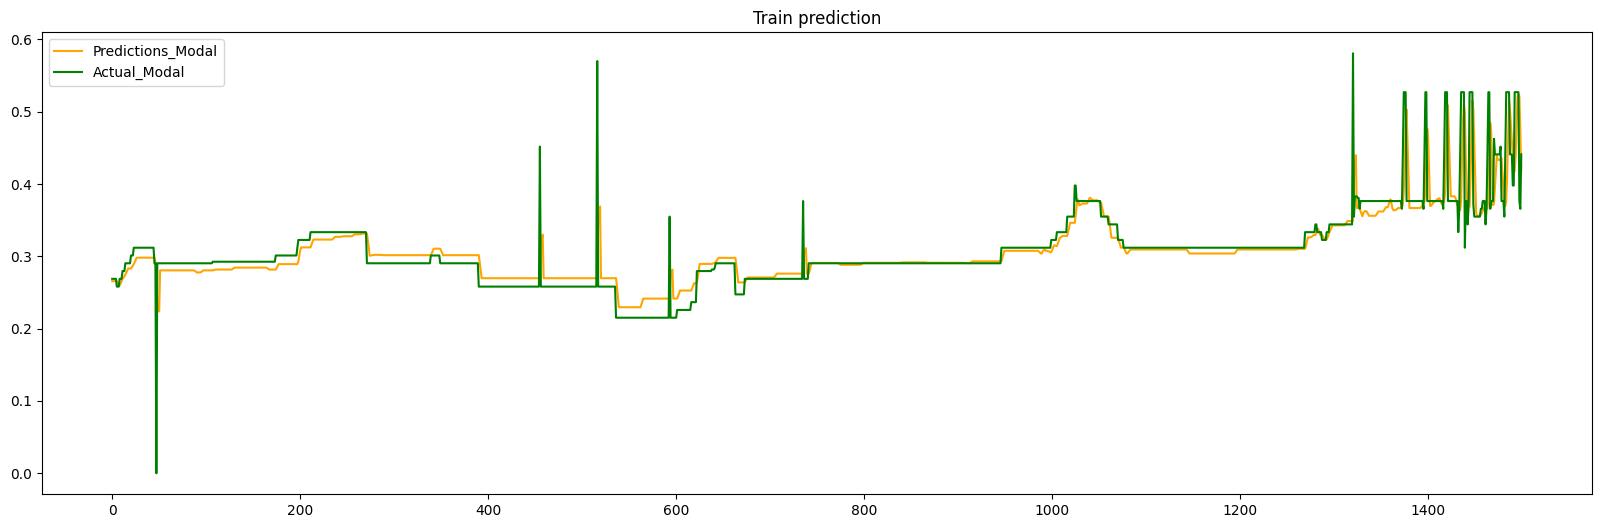

In [56]:
plot_predictions(model_coca, X_train, y_train, start=0, end=len(X_train), tag='Train prediction')

train_results = pd.DataFrame({'Train_prediction_Min': train_prediction[:, 0],
                                'Actual_Min': y_train[:, 0],
                              'Train_prediction_Max': train_prediction[:, 1],
                                'Actual_Max': y_train[:, 1],
                              'Train_prediction_Modal': train_prediction[:, 2],
                                'Actual_Modal': y_train[:, 2]})
train_results  

Mean absolute error for Val prediction is 0.09564753898097338
-------------------------------------------------------------------------------------
r2 for Val prediction is 5.47768056383409
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.389807    0.481865        0.220989    0.343915          0.385175   
1        0.411695    0.481865        0.258627    0.317460          0.431410   
2        0.437067    0.378238        0.280576    0.317460          0.480263   
3        0.430293    0.585492        0.283256    0.343915          0.502905   
4        0.449233    0.481865        0.291205    0.343915          0.505489   
5        0.450294    0.481865        0.295326    0.317460          0.507532   
6        0.474754    0.481865        0.297807    0.291005          0.514967   
7        0.449007    0.481865        0.284121    0.291005          0.497568   
8        0.44

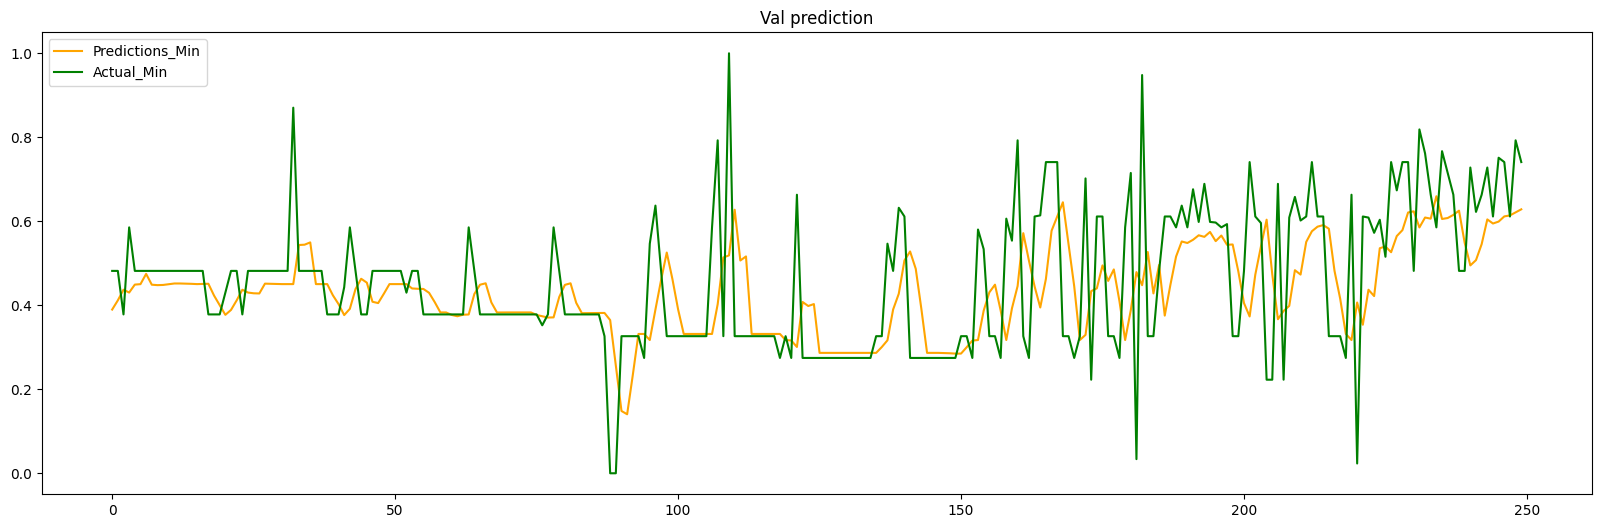

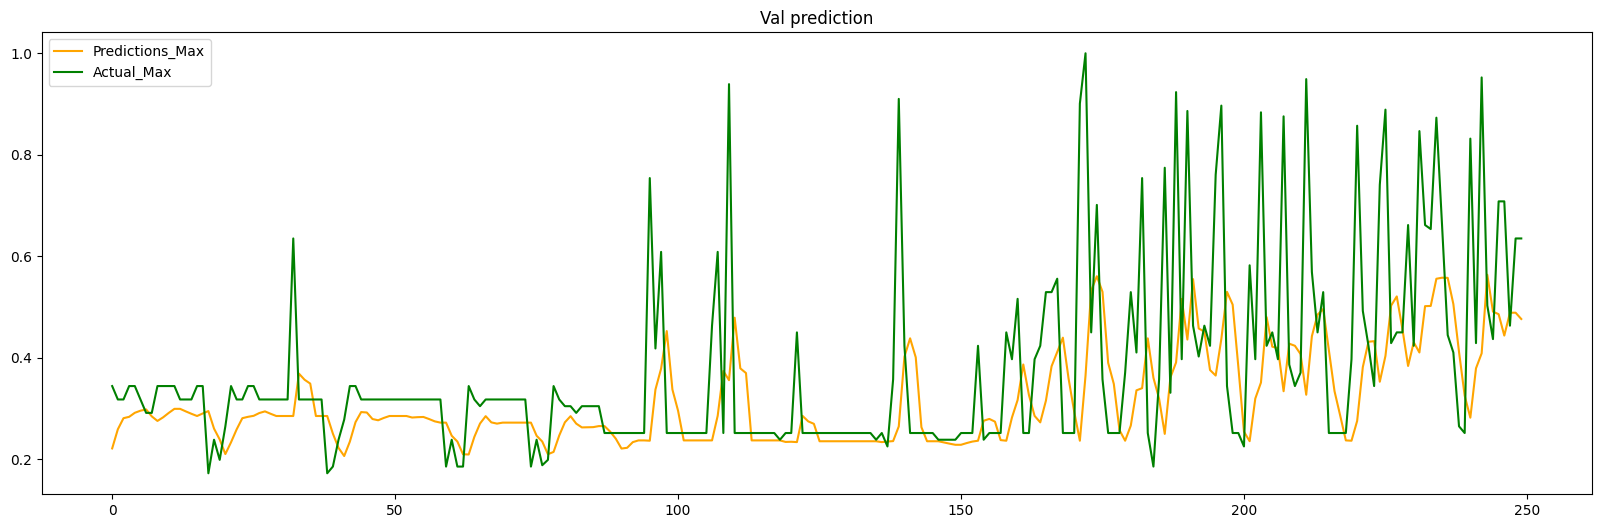

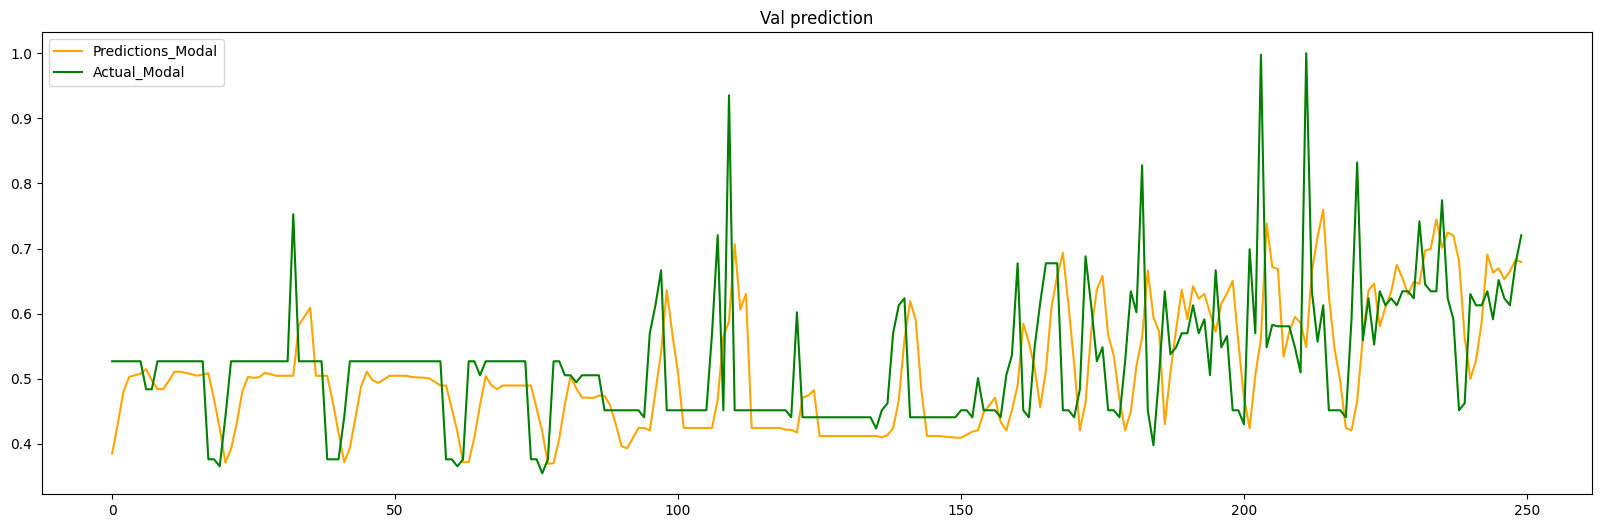

In [57]:
plot_predictions(model_coca, X_val, y_val, start=0, end=len(X_val), tag='Val prediction')

Mean absolute error for Test prediction is 0.09483615561461416
-------------------------------------------------------------------------------------
r2 for Test prediction is -24.611412415904706
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.628024    0.792746        0.462399    0.634921          0.688583   
1        0.673372    0.740933        0.502121    0.423280          0.734298   
2        0.656974    0.704663        0.453545    0.476190          0.706355   
3        0.645449    0.611399        0.422459    0.634921          0.666884   
4        0.602542    0.663212        0.418421    0.476190          0.637826   
5        0.585504    0.481865        0.424023    0.264550          0.639064   
6        0.529410    0.481865        0.368176    0.251323          0.585333   
7        0.493048    0.624352        0.293519    0.816667          0.514577   
8       

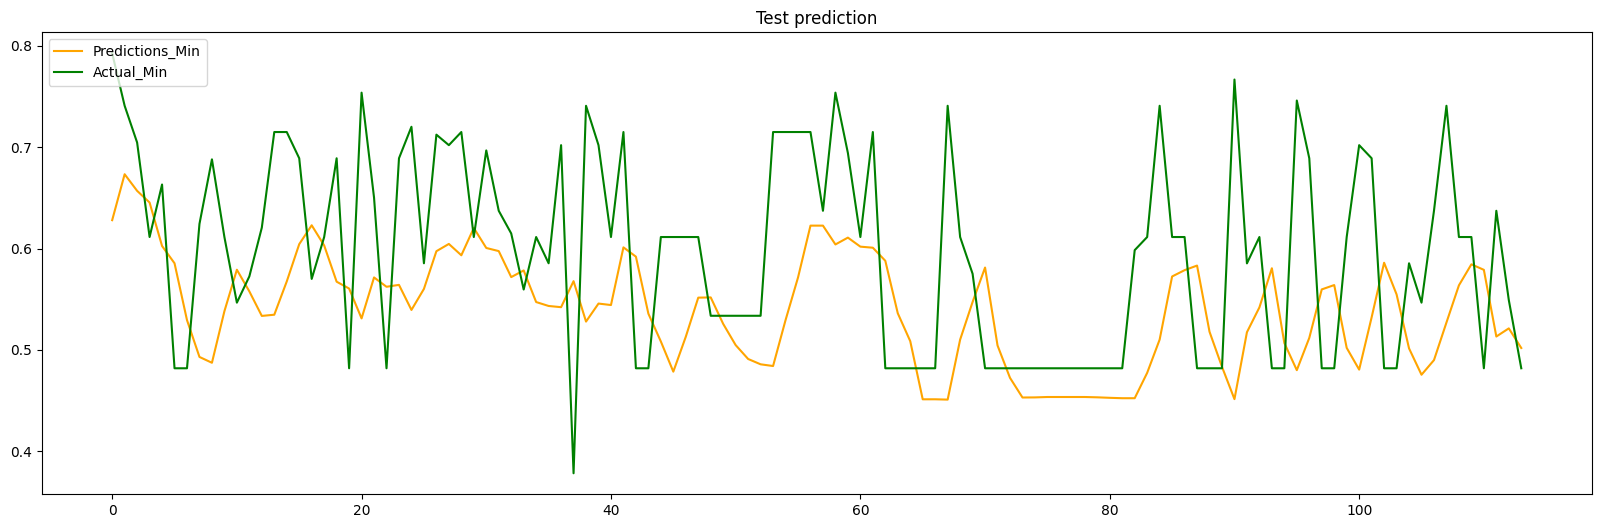

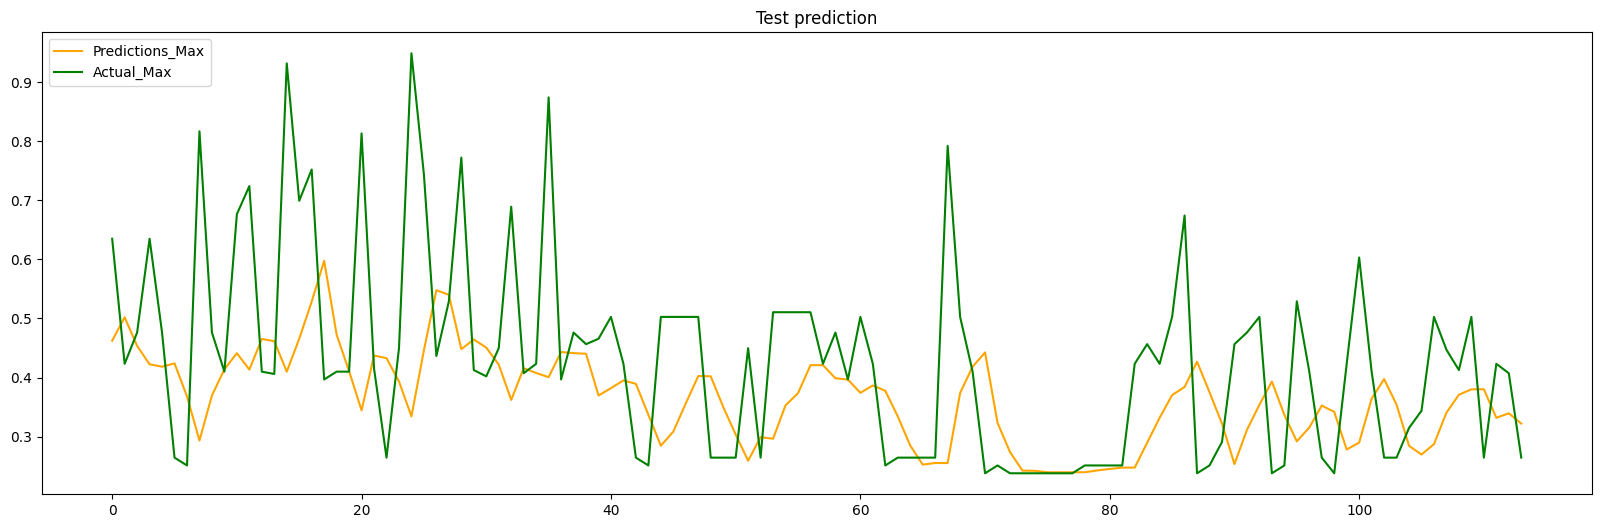

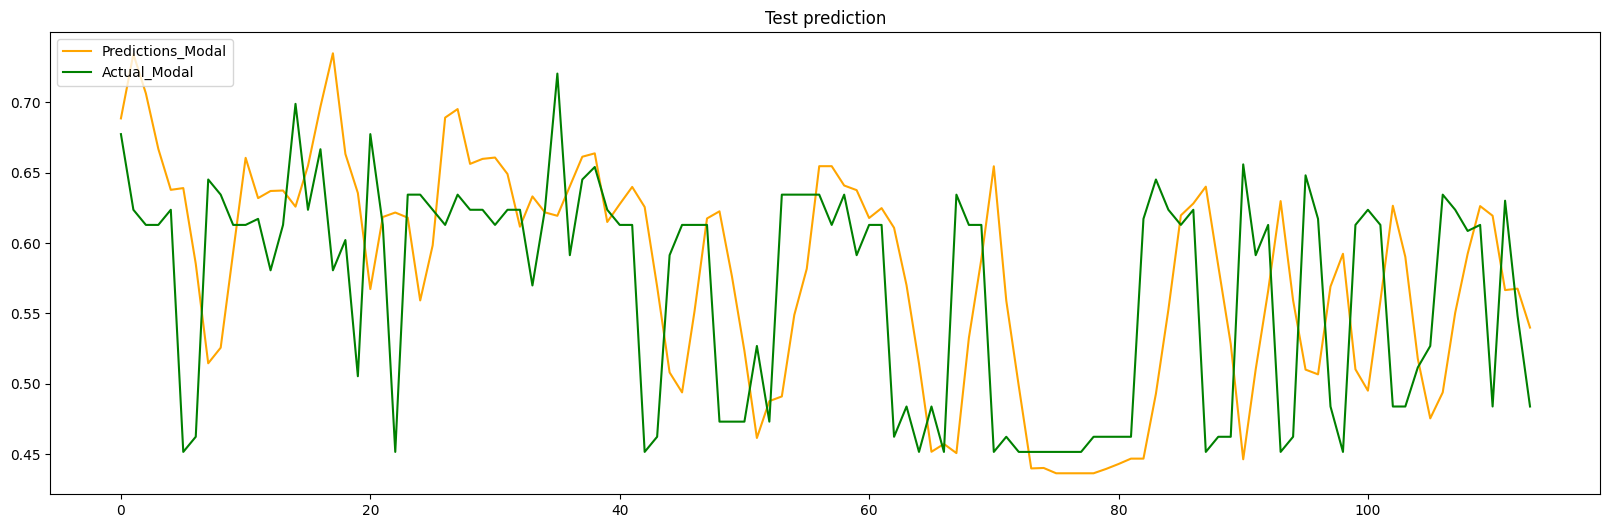

In [58]:
plot_predictions(model_coca, X_test, y_test, start=0, end=len(X_test), tag='Test prediction')

In [ ]:
from tensorflow.keras.models import save_model

# Assuming 'model_coca' is your trained Keras model
model_coca.save('./models/Coca/model_coca(3,82.989).keras')



In [81]:
from tensorflow.keras.models import load_model

model_bestmodel = load_model('./models/Coca/model_coca(3,82.989).keras')


In [62]:
import joblib

joblib.dump(scaler_coca,'./Scaler Objects/scaler_coca.pkl')

['./Scaler Objects/scaler_coca.pkl']

In [49]:
X_train[-1]

array([[0.48186528, 0.34391534, 0.52688172],
       [0.37823834, 0.17195767, 0.37634409],
       [0.37823834, 0.1984127 , 0.3655914 ]])

In [50]:
lb = X_test[-3,:,:]

In [51]:
lb.shape

(3, 3)

In [52]:
lb = lb.reshape(1,lb.shape[0],lb.shape[1])

In [53]:
fp = X_test[-3,:,:].reshape(1,X_test[-3,:,:].shape[0],X_test[-3,:,:].shape[1])

In [54]:
fp

array([[[0.61139896, 0.41269841, 0.60860215],
        [0.61139896, 0.5026455 , 0.61290323],
        [0.48186528, 0.26455026, 0.48387097]]])

In [55]:
fp.shape

(1, 3, 3)

In [56]:
X_train.shape

(1500, 3, 3)

In [57]:
future_pred = model_bestmodel.predict(fp)

1/1 [==============================] - 1s 1s/step


In [58]:
future_pred

array([[0.51320815, 0.3319986 , 0.5665979 ]], dtype=float32)

In [59]:
future_pred_unscaled = scaler_coca.inverse_transform(future_pred)
future_pred_unscaled

array([[21209.834, 27549.545, 27846.803]], dtype=float32)

In [60]:
recursive_prediction = []
recursive_prediction_unscaled = []

last_batch = X_test[-3,:,:].copy()

for i in range(31):
    reshaped_data = last_batch.reshape(1,last_batch.shape[0],last_batch.shape[1]) 
    next_day_prediction = model_bestmodel.predict(reshaped_data,verbose=0)
    recursive_prediction.append(next_day_prediction)
    last_batch[-1] = next_day_prediction

In [151]:
for j in recursive_prediction:
    print(j)

[[0.5637171  0.37102202 0.59241855]]
[[0.56931347 0.3751363  0.6112214 ]]
[[0.57098603 0.37570438 0.6163401 ]]
[[0.57146204 0.3757683  0.6176917 ]]
[[0.5715936 0.3757714 0.6180425]]
[[0.5716292  0.37577012 0.6181328 ]]
[[0.5716388  0.3757695  0.61815596]]
[[0.57164127 0.37576932 0.6181617 ]]
[[0.57164204 0.37576926 0.6181633 ]]
[[0.5716421 0.3757692 0.6181637]]
[[0.5716421  0.37576923 0.6181637 ]]
[[0.57164216 0.37576923 0.6181638 ]]
[[0.57164216 0.37576926 0.6181638 ]]
[[0.5716421  0.37576923 0.6181638 ]]
[[0.57164216 0.37576926 0.6181639 ]]
[[0.57164216 0.3757692  0.6181639 ]]
[[0.5716422  0.3757693  0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.5716421  0.37576926 0.61816376]]
[[0.571

In [152]:
for k in recursive_prediction:
    k = scaler_coca.inverse_transform(k) 
    print(k)

[[23159.48  29024.633 29047.465]]
[[23375.5   29180.152 29921.795]]
[[23440.06  29201.625 30159.816]]
[[23458.434 29204.041 30222.666]]
[[23463.512 29204.158 30238.979]]
[[23464.889 29204.111 30243.178]]
[[23465.258 29204.086 30244.254]]
[[23465.354 29204.08  30244.52 ]]
[[23465.383 29204.076 30244.594]]
[[23465.385 29204.074 30244.613]]
[[23465.385 29204.076 30244.613]]
[[23465.387 29204.076 30244.62 ]]
[[23465.387 29204.076 30244.62 ]]
[[23465.385 29204.076 30244.62 ]]
[[23465.387 29204.076 30244.621]]
[[23465.387 29204.074 30244.621]]
[[23465.389 29204.08  30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29204.076 30244.617]]
[[23465.385 29

In [170]:
t = [[22000,28000,24500],
     [25000,29264,28177],
     [25000,29500,28000]]

In [171]:
t =np.array(t)

In [172]:
t.shape

(3, 3)

In [173]:
t_scaled = scaler_coca.transform(t)

c:\Users\SUJAN ACHARYA\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [174]:
t_scaled

array([[0.53367876, 0.34391534, 0.49462366],
       [0.61139896, 0.3773545 , 0.57369892],
       [0.61139896, 0.38359788, 0.56989247]])

In [175]:
t_scaled = t_scaled.reshape(1,t_scaled.shape[0],t_scaled.shape[1])
tom_pred = model_bestmodel.predict(t_scaled)

1/1 [==============================] - 0s 33ms/step


In [176]:
tom_pred = scaler_coca.inverse_transform(tom_pred)

In [177]:
tom_pred

array([[21550.244, 27381.781, 26635.84 ]], dtype=float32)

plt.figure(figsize=(10,6))
plt.plot(train_results['Train_prediction_Min'][600:],color='orange',label='Predictions_Min')
plt.plot(train_results['Actual_Min'][600:],color='green',label='Actual_Min')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(train_results['Train_prediction_Max'][1000:],color='orange',label='Predictions_Max')
plt.plot(train_results['Actual_Max'][1000:],color='green',label='Actual_Max')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(train_results['Train_prediction_Modal'][1000:],color='orange',label='Predictions_Modal')
plt.plot(train_results['Actual_Modal'][1000:],color='green',label='Actual_Modal')
plt.legend(loc='upper left')
plt.show()

val_results = pd.DataFrame({'val_prediction_Min': val_prediction[:, 0],
                                'Actual_Min': y_val[:, 0],
                              'val_prediction_Max': val_prediction[:, 1],
                                'Actual_Max': y_val[:, 1],
                              'val_prediction_Modal': val_prediction[:, 2],
                                'Actual_Modal': y_val[:, 2]})
val_results

plt.figure(figsize=(10,6))
plt.plot(val_results['val_prediction_Min'][200:],color='orange',label='Predictions_Min')
plt.plot(val_results['Actual_Min'][200:],color='green',label='Actual_Min')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(val_results['val_prediction_Max'][:],color='orange',label='Predictions_Max')
plt.plot(val_results['Actual_Max'][:],color='green',label='Actual_Max')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(val_results['val_prediction_Modal'],color='orange',label='Predictions_Modal')
plt.plot(val_results['Actual_Modal'],color='green',label='Actual_Modal')
plt.legend(loc='upper left')
plt.show()

test_results = pd.DataFrame({'test_prediction_Min': test_prediction[:, 0],
                                'Actual_Min': y_test[:, 0],
                              'test_prediction_Max': test_prediction[:, 1],
                                'Actual_Max': y_test[:, 1],
                              'test_prediction_Modal': test_prediction[:, 2],
                                'Actual_Modal': y_test[:, 2]})

test_results

plt.figure(figsize=(10,6))
plt.plot(test_results['test_prediction_Min'][:],color='orange',label='Predictions_Min')
plt.plot(test_results['Actual_Min'][:],color='green',label='Actual_Min')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(test_results['test_prediction_Max'][:],color='orange',label='Predictions_Min')
plt.plot(test_results['Actual_Max'][:],color='green',label='Actual_Min')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(test_results['test_prediction_Modal'][:],color='orange',label='Predictions_Min')
plt.plot(test_results['Actual_Modal'][:],color='green',label='Actual_Min')
plt.legend(loc='upper left')
plt.show()